<a href="https://colab.research.google.com/github/safdarjung/projects/blob/main/Kmeans_RAI_SW_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [2]:
df_train = pd.read_excel('/content/train.xlsx')
df_train.shape

(36752, 19)

In [3]:
df_test = pd.read_excel('/content/test.xlsx')
df_test.shape

(15752, 18)

In [4]:
df_train.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33


In [5]:
df_train.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11',
       'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'target'],
      dtype='object')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36752 entries, 0 to 36751
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T1      36752 non-null  int64 
 1   T2      36752 non-null  int64 
 2   T3      36752 non-null  int64 
 3   T4      36752 non-null  int64 
 4   T5      36752 non-null  int64 
 5   T6      36752 non-null  int64 
 6   T7      36752 non-null  int64 
 7   T8      36752 non-null  int64 
 8   T9      36752 non-null  int64 
 9   T10     36752 non-null  int64 
 10  T11     36752 non-null  int64 
 11  T12     36752 non-null  int64 
 12  T13     36752 non-null  int64 
 13  T14     36752 non-null  int64 
 14  T15     36752 non-null  int64 
 15  T16     36752 non-null  int64 
 16  T17     36752 non-null  int64 
 17  T18     36752 non-null  int64 
 18  target  36752 non-null  object
dtypes: int64(18), object(1)
memory usage: 5.3+ MB


In [7]:
df_train.target.unique()

array(['B37', 'B61', 'A19', 'A22', 'A33', 'A75', 'A41', 'B14', 'B80',
       'B64', 'A1', 'B21', 'A70', 'B57', 'B9', 'B50', 'B31', 'A21', 'B30',
       'A4', 'B40', 'B6', 'A64', 'A25', 'B18', 'A66', 'A53', 'B73', 'A50',
       'B25', 'A29', 'A35', 'A3', 'A46', 'B45', 'A36', 'B5', 'A79', 'A32',
       'B23', 'A7', 'A62', 'A71', 'A58', 'A9', 'B63', 'B51', 'B8', 'B36',
       'A14', 'A15', 'A24', 'B38', 'A10', 'B4', 'A37', 'A12', 'B41',
       'A17', 'B49', 'B71', 'B59', 'B39', 'B29', 'A76', 'B58', 'B28',
       'A77', 'A67', 'B24', 'A31', 'A34', 'A5', 'B34', 'A11', 'B16',
       'B20', 'A63', 'B53', 'A73', 'A44', 'A69', 'A56', 'A54', 'A55',
       'B11', 'A42', 'B22', 'B67', 'A74', 'A57', 'A8', 'B46', 'B15',
       'A51', 'A40', 'A59', 'A72', 'B32', 'A2', 'A13', 'B17', 'A65',
       'A52', 'A47', 'B47', 'B77', 'B3', 'B35', 'B44', 'A80', 'B43',
       'B54', 'B75', 'A49', 'B52', 'B33', 'B2', 'B1', 'A39', 'B7', 'A20',
       'A18', 'B12', 'A27', 'A6', 'A68', 'B72', 'B66', 'B69', 'A26',
   

In [20]:
X = df_train.drop(columns=['target'])
y = df_train['target']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

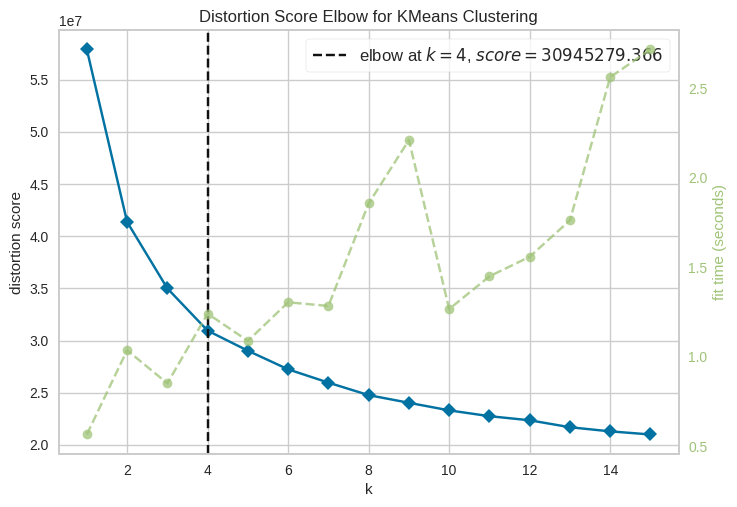

In [10]:
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1,16))
visualizer.fit(X)
visualizer.poof()
plt.show()

In [27]:


# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans_clusters = kmeans.fit_predict(X_scaled)

# Calculate Silhouette Score
kmeans_silhouette = silhouette_score(X_scaled, kmeans_clusters)
print(f'K-Means Silhouette Score: {kmeans_silhouette}')
labels = kmeans.labels_
np.unique(labels)

K-Means Silhouette Score: 0.19411631558661258


array([0, 1, 2, 3], dtype=int32)

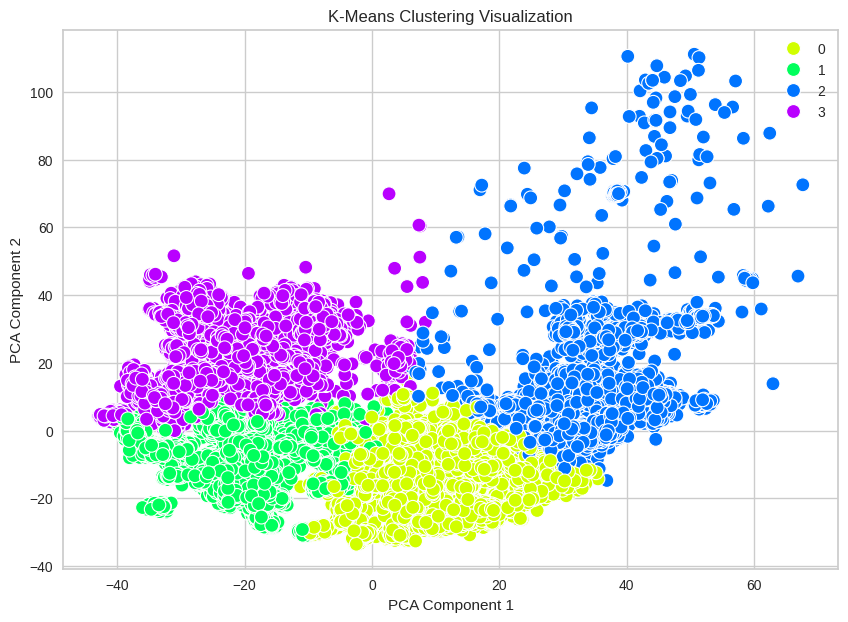

In [30]:
from sklearn.decomposition import PCA


# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters
plt.figure(figsize=(10, 7))

# Create a palette with a different color for each cluster
palette = sns.color_palette("hsv", np.unique(labels).max() + 1)

# Scatter plot with different colors for each cluster
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette=palette, legend='full', s=100)

# Plot the cluster centers
# centers_pca = pca.transform(kmeans.cluster_centers_)
# plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.75)

plt.title('K-Means Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


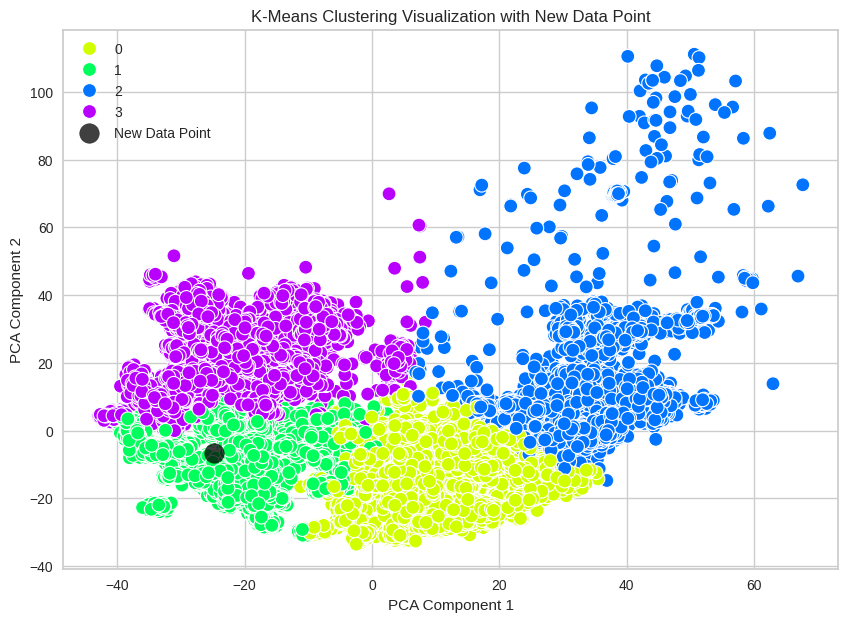

The new data point belongs to cluster 2 with distances [264.05425837 264.13839317 263.47420793 263.6619077 ]


In [33]:
def identify_cluster(new_data_point, kmeans_model, pca_model):
    # Predict the cluster for the new data point
    cluster_label = kmeans_model.predict([new_data_point])[0]

    # Calculate distances to each centroid
    distances = kmeans_model.transform([new_data_point])[0]

    # Get the PCA coordinates of the new data point
    new_data_point_pca = pca_model.transform([new_data_point])[0]

    # Plot the new data point in the PCA space
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette=palette, legend='full', s=100)
    plt.scatter(new_data_point_pca[0], new_data_point_pca[1], c='black', s=200, alpha=0.75, marker='o', label='New Data Point')

    plt.title('K-Means Clustering Visualization with New Data Point')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()

    return cluster_label, distances

# Example new data point
new_data_point = df_test.iloc[6]

# Identify the cluster and get distances
cluster_label, distances = identify_cluster(new_data_point, kmeans, pca)
print(f"The new data point belongs to cluster {cluster_label} with distances {distances}")
